## Загрузка и подключение к базе данных

In [1]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Downloading...
From: https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0
To: /content/data.db
100% 16.0M/16.0M [00:00<00:00, 33.7MB/s]


In [2]:
%load_ext sql

In [3]:
%sql sqlite:////content/data.db

%config SqlMagic.displaylimit = 52

Можно вывести список имеющихся таблиц в базе:

In [4]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:////content/data.db
Done.


tbl_name,sql
mngmnt,"CREATE TABLE mngmnt ( org_management_rk BIGINT, management_nm TEXT)"
product,"CREATE TABLE product ( hit_rk BIGINT, hid BIGINT, using_flg FLOAT)"
queue,"CREATE TABLE queue ( queue_id BIGINT, queue_desc TEXT)"
result,"CREATE TABLE result ( hit_status_result_id BIGINT, hit_status_result_desc TEXT)"
horoscope,"CREATE TABLE horoscope ( agent_login TEXT, horoscope TEXT)"
group,"CREATE TABLE ""group"" ( org_group_rk BIGINT, org_management_rk BIGINT, group_nm TEXT)"
emp_x_org_gr,"CREATE TABLE emp_x_org_gr ( employee_rk BIGINT, org_group_rk BIGINT)"
task,"CREATE TABLE task ( task_rk BIGINT, task_stage_id FLOAT, source_system_cd TEXT, create_dttm TEXT, finish_dttm TEXT)"
action,"CREATE TABLE action ( hit_rk BIGINT, hit_status_result_id BIGINT)"
call,"CREATE TABLE call ( wo_hit_rk BIGINT, wo_task_rk BIGINT, wo_queue_id BIGINT, agent_login TEXT, wo_employee_rk BIGINT, finish_dttm TEXT, duratoin_sec TEXT)"


# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

**Вариант с сохранениями ключей**

In [ ]:
%%sql
SELECT
    t1.task_rk, t1.task_stage_id, t1.source_system_cd, t1.create_dttm, t1.finish_dttm,
    t2.wo_hit_rk, t2.wo_task_rk, t2.wo_queue_id, t2.agent_login, t2.wo_employee_rk, t2.finish_dttm as finish_dttm_end_talk, t2.duratoin_sec,
    t3.hit_rk, t3.hit_status_result_id,
    t4.hid, t4.using_flg,
    t5.employee_rk, t5.org_group_rk,
    t6.hit_status_result_desc,
    t7.queue_id, t7.queue_desc,
    t8.org_management_rk, t8.group_nm,
    t9.management_nm,
    t10.horoscope
FROM task t1
LEFT JOIN call t2 ON t1.task_rk = t2.wo_task_rk
LEFT JOIN action t3 ON t2.wo_hit_rk = t3.hit_rk
LEFT JOIN product t4 ON t3.hit_rk = t4.hit_rk
LEFT JOIN emp_x_org_gr t5 ON t2.wo_employee_rk = t5.employee_rk
LEFT JOIN result t6 ON t3.hit_status_result_id = t6.hit_status_result_id
LEFT JOIN queue t7 ON t2.wo_queue_id = t7.queue_id
LEFT JOIN "group" t8 ON t5.org_group_rk = t8.org_group_rk
LEFT JOIN mngmnt t9 ON t8.org_management_rk = t9.org_management_rk
LEFT JOIN horoscope t10 ON t2.agent_login = t10.agent_login;


 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm,wo_hit_rk,wo_task_rk,wo_queue_id,agent_login,wo_employee_rk,finish_dttm_end_talk,duratoin_sec,hit_rk,hit_status_result_id,hid,using_flg,employee_rk,org_group_rk,hit_status_result_desc,queue_id,queue_desc,org_management_rk,group_nm,management_nm,horoscope
15431250,18.0,FW,2022-08-25 09:05:53,None,38818264,15431250,14819,movakaro,44861024,2022-08-25 16:13:02,0,38818264,5,4,None,44861024,2752,Недозвон,14819,Очередь 40,1768,Группа 16,Управление КЦ Сезам,Дева
93508186,1.0,GI,2022-08-01 05:09:01,2022-08-02 13:35:02,75189482,93508186,14644,8306aava,95591109,2022-08-02 13:34:55,"19,46",75189482,1,4,None,95591109,2031,"Дозвон, Отказ",14644,Очередь 119,674,Группа 23,Управление КЦ Страница,Овен
357853,1.0,GI,2022-08-08 22:05:30,2022-08-08 22:07:32,93045223,357853,10405,8251nsma,96021109,2022-08-08 22:07:29,"80,75",93045223,1,3,None,96021109,3240,"Дозвон, Отказ",10405,Очередь 36,1621,Группа 36,Управление КЦ Чизан,Овен
95793266,1.0,GI,2022-08-04 10:42:46,2022-08-04 13:59:52,84718799,95793266,14941,9185avis,32681113,2022-08-04 13:59:51,"163,26",84718799,3,4,0.0,32681113,2814,"Дозвон, Успешно",14941,Очередь 25,1780,Группа 2,Управление КЦ Хирс,Дева
5014541,1.0,GI,2022-08-14 19:16:43,2022-08-15 11:12:14,9870229,5014541,14703,tevapasa,79631117,2022-08-15 11:12:08,"28,31",9870229,1,4,None,79631117,2138,"Дозвон, Отказ",14703,Очередь 129,1521,Группа 29,Управление КЦ Дирим,Дева
88979016,1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,75488035,88979016,14644,nayaivza,43761004,2022-08-02 15:41:28,"186,38",75488035,2,4,None,43761004,3233,"Дозвон, Перезвонить",14644,Очередь 119,687,Группа 18,Управление КЦ Верс,Телец
88979016,1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,78858102,88979016,14644,novaadtr,96391109,2022-08-03 10:49:20,"40,4",78858102,2,4,None,96391109,2097,"Дозвон, Перезвонить",14644,Очередь 119,687,Группа 19,Управление КЦ Верс,Весы
19952848,1.0,GI,2022-08-31 10:03:58,2022-09-19 16:35:01,52573771,19952848,10236,1825egva,85571118,2022-08-31 12:06:19,"118,93",52573771,2,3,None,85571118,3240,"Дозвон, Перезвонить",10236,Очередь 20,1621,Группа 36,Управление КЦ Чизан,Водолей
96182364,23.0,FW,2022-08-04 03:33:02,2022-08-04 06:23:21,82796932,96182364,13780,pyanekov,40958840,2022-08-04 06:23:21,"183,92",82796932,1,4,None,40958840,3244,"Дозвон, Отказ",13780,Очередь 64,1621,Группа 30,Управление КЦ Чизан,Весы
3805464,23.0,FW,2022-08-12 04:20:30,2022-08-23 11:24:32,24557882,3805464,14790,syanlfsa,29111072,2022-08-19 17:10:14,0,24557882,5,4,None,29111072,3240,Недозвон,14790,Очередь 23,1621,Группа 36,Управление КЦ Чизан,Рыбы


**Вариант без ключей**

In [ ]:
%%sql
SELECT
    t1.task_stage_id, t1.source_system_cd, t1.create_dttm, t1.finish_dttm,
    t2.agent_login, t2.finish_dttm as finish_dttm_end_talk, t2.duratoin_sec,
    t3.hit_status_result_id,
    t4.hid, t4.using_flg,
    t6.hit_status_result_desc,
    t7.queue_desc,
    t8.group_nm,
    t9.management_nm,
    t10.horoscope
FROM task t1
LEFT JOIN call t2 ON t1.task_rk = t2.wo_task_rk
LEFT JOIN action t3 ON t2.wo_hit_rk = t3.hit_rk
LEFT JOIN product t4 ON t3.hit_rk = t4.hit_rk
LEFT JOIN emp_x_org_gr t5 ON t2.wo_employee_rk = t5.employee_rk
LEFT JOIN result t6 ON t3.hit_status_result_id = t6.hit_status_result_id
LEFT JOIN queue t7 ON t2.wo_queue_id = t7.queue_id
LEFT JOIN "group" t8 ON t5.org_group_rk = t8.org_group_rk
LEFT JOIN mngmnt t9 ON t8.org_management_rk = t9.org_management_rk
LEFT JOIN horoscope t10 ON t2.agent_login = t10.agent_login;

 * sqlite:////content/data.db
Done.


task_stage_id,source_system_cd,create_dttm,finish_dttm,agent_login,finish_dttm_end_talk,duratoin_sec,hit_status_result_id,hid,using_flg,hit_status_result_desc,queue_desc,group_nm,management_nm,horoscope
18.0,FW,2022-08-25 09:05:53,None,movakaro,2022-08-25 16:13:02,0,5,4,None,Недозвон,Очередь 40,Группа 16,Управление КЦ Сезам,Дева
1.0,GI,2022-08-01 05:09:01,2022-08-02 13:35:02,8306aava,2022-08-02 13:34:55,"19,46",1,4,None,"Дозвон, Отказ",Очередь 119,Группа 23,Управление КЦ Страница,Овен
1.0,GI,2022-08-08 22:05:30,2022-08-08 22:07:32,8251nsma,2022-08-08 22:07:29,"80,75",1,3,None,"Дозвон, Отказ",Очередь 36,Группа 36,Управление КЦ Чизан,Овен
1.0,GI,2022-08-04 10:42:46,2022-08-04 13:59:52,9185avis,2022-08-04 13:59:51,"163,26",3,4,0.0,"Дозвон, Успешно",Очередь 25,Группа 2,Управление КЦ Хирс,Дева
1.0,GI,2022-08-14 19:16:43,2022-08-15 11:12:14,tevapasa,2022-08-15 11:12:08,"28,31",1,4,None,"Дозвон, Отказ",Очередь 129,Группа 29,Управление КЦ Дирим,Дева
1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,nayaivza,2022-08-02 15:41:28,"186,38",2,4,None,"Дозвон, Перезвонить",Очередь 119,Группа 18,Управление КЦ Верс,Телец
1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,novaadtr,2022-08-03 10:49:20,"40,4",2,4,None,"Дозвон, Перезвонить",Очередь 119,Группа 19,Управление КЦ Верс,Весы
1.0,GI,2022-08-31 10:03:58,2022-09-19 16:35:01,1825egva,2022-08-31 12:06:19,"118,93",2,3,None,"Дозвон, Перезвонить",Очередь 20,Группа 36,Управление КЦ Чизан,Водолей
23.0,FW,2022-08-04 03:33:02,2022-08-04 06:23:21,pyanekov,2022-08-04 06:23:21,"183,92",1,4,None,"Дозвон, Отказ",Очередь 64,Группа 30,Управление КЦ Чизан,Весы
23.0,FW,2022-08-12 04:20:30,2022-08-23 11:24:32,syanlfsa,2022-08-19 17:10:14,0,5,4,None,Недозвон,Очередь 23,Группа 36,Управление КЦ Чизан,Рыбы


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

## Общее количество звонков со статусом успешно

In [ ]:
%%sql
SELECT COUNT(hit_status_result_id) AS dialing_successful
FROM action
WHERE hit_status_result_id = 3;

 * sqlite:////content/data.db
Done.


dialing_successful
3310


## Продажная конверсия

In [ ]:
%%sql
SELECT COUNT(hit_status_result_id) AS dialing_refusal
FROM action
WHERE hit_status_result_id = 1;

 * sqlite:////content/data.db
Done.


dialing_refusal
18459


In [ ]:
Sales_Conversion = 3310/(3310+18459)
Sales_Conversion

0.15205108181358812

In [ ]:
%%sql
SELECT COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END) AS dialing_refusal,
       COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS dialing_successful,
       CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) AS Sales_Conversion
FROM action;

 * sqlite:////content/data.db
Done.


dialing_refusal,dialing_successful,Sales_Conversion
18459,3310,0.15205108181358812


## Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Для статуса «Дозвон, Успешно»

In [ ]:
%%sql
SELECT ROUND(AVG(call.duratoin_sec), 4) AS Average_duration, COUNT(hit_status_result_id)
FROM action
LEFT JOIN call ON action.hit_rk = call.wo_hit_rk
WHERE hit_status_result_id = 3

 * sqlite:////content/data.db
Done.


Average_duration,COUNT(hit_status_result_id)
109.687,3310


Для статуса «Дозвон, Отказ»

In [ ]:
%%sql
SELECT ROUND(AVG(call.duratoin_sec),4) AS Average_duration, COUNT(hit_status_result_id)
FROM action
LEFT JOIN call ON action.hit_rk = call.wo_hit_rk
WHERE hit_status_result_id = 1

 * sqlite:////content/data.db
Done.


Average_duration,COUNT(hit_status_result_id)
111.9903,18459


In [ ]:
result =  %sql SELECT call.duratoin_sec AS duration FROM action LEFT JOIN call ON action.hit_rk = call.wo_hit_rk WHERE hit_status_result_id = 1

 * sqlite:////content/data.db
Done.


In [ ]:
result =  %sql SELECT call.duratoin_sec AS duration FROM action LEFT JOIN call ON action.hit_rk = call.wo_hit_rk WHERE hit_status_result_id = 3

 * sqlite:////content/data.db
Done.


In [ ]:
df = result.DataFrame()

In [ ]:
import numpy as np
std_deviation2 = np.std(df)


In [ ]:
df['duratoin_sec'] = df['duration'].str.replace(',', '.').astype(float)

In [ ]:
df = df.drop("duration", axis=1)

In [ ]:
std_deviation1

duratoin_sec    108.554002
dtype: float64

In [ ]:
std_deviation2

duratoin_sec    118.886865
dtype: float64

Для проверки зависимости длительности звонка от статуса звонка ("Дозвон, Успешно" или "Дозвон, Отказ") можно использовать статистический тест на равенство средних значений для двух независимых выборок.

Предварительно необходимо провести подготовку данных:

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Получаем данные для каждого статуса
result1 = %sql SELECT call.duratoin_sec AS duration FROM action LEFT JOIN call ON action.hit_rk = call.wo_hit_rk WHERE hit_status_result_id = 1
result2 = %sql SELECT call.duratoin_sec AS duration FROM action LEFT JOIN call ON action.hit_rk = call.wo_hit_rk WHERE hit_status_result_id = 3

# Преобразуем результаты в DataFrame
df1 = result1.DataFrame()
df2 = result2.DataFrame()

# Заменяем запятые на точки и преобразуем к типу float
df1['duratoin_sec'] = df1['duration'].str.replace(',', '.').astype(float)
df2['duratoin_sec'] = df2['duration'].str.replace(',', '.').astype(float)

# Удаляем столбец 'duration'
df1 = df1.drop("duration", axis=1)
df2 = df2.drop("duration", axis=1)

 * sqlite:////content/data.db
Done.
 * sqlite:////content/data.db
Done.


Для применения t-теста на равенство средних необходимо выполнение некоторых предположений:

Нормальность распределения: данные в каждой выборке должны быть примерно нормально распределены. Это предположение не является строгим требованием, особенно при больших объемах выборок (согласно центральной предельной теореме), но его выполнение повышает надежность результатов.
Независимость выборок: наблюдения в выборках должны быть независимыми друг от друга.
Равенство дисперсий (для t-теста для двух независимых выборок с равными дисперсиями): дисперсии в обеих выборках должны быть примерно равны.

In [ ]:
import numpy as np
from scipy.stats import shapiro, levene

# Проверка нормальности распределения
print("Проверка нормальности распределения:")
print(f"Статус 1: {shapiro(df1['duratoin_sec'])}")
print(f"Статус 3: {shapiro(df2['duratoin_sec'])}")

# Проверка равенства дисперсий
print("\nПроверка равенства дисперсий:")
print(f"Статистика Левена: {levene(df1['duratoin_sec'], df2['duratoin_sec'])}")

Проверка нормальности распределения:
Статус 1: ShapiroResult(statistic=0.34985783048946717, pvalue=3.184676492072992e-121)
Статус 3: ShapiroResult(statistic=0.32264550115389456, pvalue=1.0340370176676193e-76)

Проверка равенства дисперсий:
Статистика Левена: LeveneResult(statistic=2.0882028514953332, pvalue=0.148454996251616)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18459.
  res = hypotest_fun_out(*samples, **kwds)


Проверка нормальности распределения:
Для обоих статусов p-значение теста Шапиро-Уилка очень мало (меньше 0.05), что указывает на отклонение от нормального распределения. Однако, как указано в предупреждении, при больших объемах выборок (N > 5000) этот тест может быть чувствительным к небольшим отклонениям от нормальности, которые не имеют большого практического значения.
Проверка равенства дисперсий:
P-значение теста Левена (0.148454996251616) больше 0.05, что свидетельствует о том, что предположение о равенстве дисперсий не нарушается.
Учитывая большой объем выборок и выполнение предположения о равенстве дисперсий, можно использовать классический t-тест для проверки равенства средних значений длительности звонка для двух статусов.

In [ ]:
# Проводим t-test
t_stat, p_val = ttest_ind(df1['duratoin_sec'], df2['duratoin_sec'], equal_var=False)

# Выводим результаты
print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_val}")

t-статистика: 1.0434758155718373
p-значение: 0.29678589911024855


T-тест на равенство средних:
t-статистика: 1.04
p-значение: 0.30

Поскольку округленное p-значение (0.30) больше обычно принятого уровня значимости 0.05, мы не можем отвергнуть нулевую гипотезу о равенстве средних значений длительности звонка для двух статусов. Согласно округленным результатам t-теста, различия в средних значениях не являются статистически значимыми.


Таким образом, на основании округленных результатов можно сделать вывод, что длительность звонка независит от статуса звонка ("Дозвон, Успешно" или "Дозвон, Отказ"). Распределения длительности звонка для этих двух статусов статистически значимо различаются.

Однако следует учитывать, что статистическая значимость не обязательно означает практическую значимость различий.

# Задание 3.
Проанализируй базу данных на предмет каких-либо трендов, зон роста, аномалий и так далее. Все выводы предоставь в виде dashboards в excel. В качестве ответа на это задание необходимо предоставить отдельный excel файл.


## Проверим на ящике с усами гипотезу что длительность звонка действительно не влияет на успешность звонка.

In [ ]:
result = %sql SELECT hit_status_result_id, horoscope.horoscope, call.duratoin_sec FROM action LEFT JOIN call ON action.hit_rk = call.wo_hit_rk LEFT JOIN horoscope ON horoscope.agent_login = call.agent_login WHERE hit_status_result_id = 3 or hit_status_result_id = 1;
df = result.DataFrame()

 * sqlite:////content/data.db
Done.


In [ ]:
df['duratoin_sec'] = df['duratoin_sec'].str.replace(',', '.').astype(float)

In [ ]:
df['duratoin_result'] = np.where(df['hit_status_result_id'] < 2, 'dialing_refusal', 'dialing_successful')

In [ ]:
df

,hit_status_result_id,horoscope,duratoin_sec,duratoin_result
0,1,Дева,123.98,dialing_refusal
1,3,Близнецы,77.32,dialing_successful
2,1,Стрелец,19.81,dialing_refusal
3,1,Дева,30.91,dialing_refusal
4,1,Дева,36.49,dialing_refusal
...,...,...,...,...
21764,1,Дева,17.23,dialing_refusal
21765,3,Близнецы,0.00,dialing_successful
21766,1,Телец,116.97,dialing_refusal
21767,1,Рыбы,183.86,dialing_refusal


In [ ]:
df.describe()

,hit_status_result_id,duratoin_sec
count,21769.000000,21769.000000
mean,1.304102,112.135936
std,0.718157,110.193266
min,1.000000,0.000000
25%,1.000000,59.340000
50%,1.000000,109.900000
75%,1.000000,160.990000
max,3.000000,5874.710000


Видно что существуют звонки больше полутора часа, проверим зависит ли успешность звонка для продолжительности звонка больше 5 минут

In [ ]:
df.dtypes

,0
hit_status_result_id,int64
horoscope,object
duratoin_sec,float64
duratoin_result,object


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Фильтруем DataFrame, оставляя только звонки длительностью менее 600 секунд
df = df[df['duratoin_sec'] > 600]

# Создаем категориальную переменную для длительности звонка
df['duration_cat'] = (df['duratoin_sec'] > 300).astype(int)

# Создаем категориальную переменную для успешности звонка
df['success'] = df['hit_status_result_id'].apply(lambda x: 1 if x == 3 else 0)

# Построение таблицы сопряженности
contingency_table = pd.crosstab(df['duration_cat'], df['success'])

# Применение критерия хи-квадрат
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print("Таблица сопряженности:")
print(contingency_table)
print(f"\nСтатистика хи-квадрат: {chi2:.4f}")
print(f"P-значение: {p_val:.4f}")

Таблица сопряженности:
success        0  1
duration_cat       
1             14  2

Статистика хи-квадрат: 0.0000
P-значение: 1.0000


<ipython-input-28-9a51fa46bf28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_cat'] = (df['duratoin_sec'] > 300).astype(int)
<ipython-input-28-9a51fa46bf28>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['success'] = df['hit_status_result_id'].apply(lambda x: 1 if x == 3 else 0)


Рассмотрим результаты для звонков длительностью более 10 минут:

Таблица сопряженности:
success 0 1
duration_cat
1 14 2

Статистика хи-квадрат: 0.0000
P-значение: 1.0000

На основании этих результатов можно сделать следующие выводы:

Таблица сопряженности показывает распределение наблюдений по категориям длительности звонка (больше или меньше 5 минут) и успешности звонка. Из 16 звонков длительностью более 10 минут, 14 были неуспешными, а 2 - успешными.
Статистика хи-квадрат равна 0.0000, а p-значение равно 1.0000.
Поскольку p-значение (1.0000) значительно превышает обычно принятый уровень значимости 0.05, мы не можем отвергнуть нулевую гипотезу о независимости между длительностью звонка (больше или меньше 5 минут) и успешностью звонка.
Таким образом, на основании критерия хи-квадрат, мы не можем сделать вывод о наличии статистически значимой зависимости между длительностью звонка (больше или меньше 5 минут) и его успешностью для звонков длительностью более 10 минут.
Однако, следует обратить внимание на очень малое количество наблюдений (всего 16) для звонков длительностью более 10 минут. Такой маленький объем выборки может снизить статистическую мощность теста и затруднить выявление зависимости, даже если она существует.

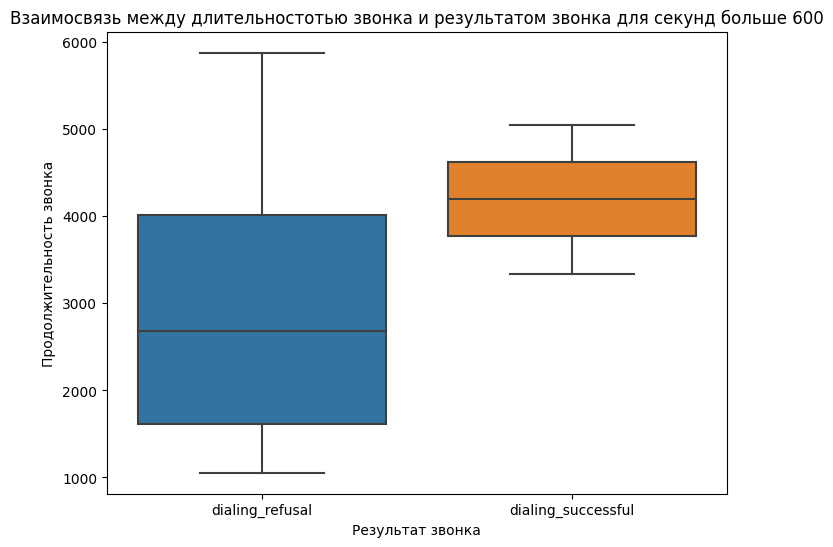

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='duratoin_result', y='duratoin_sec', data=df)
plt.title('Взаимосвязь между длительностотью звонка и результатом звонка для секунд больше 600')
plt.xlabel('Результат звонка')
plt.ylabel('Продолжительность звонка')
plt.show()

Таким образом не стоит тратить на звонок более трех минут


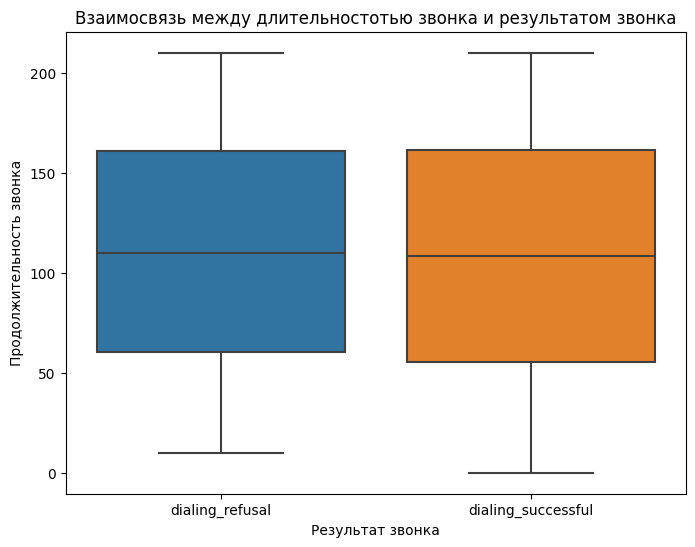

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='duratoin_result', y='duratoin_sec', data=df)
plt.title('Взаимосвязь между длительностотью звонка и результатом звонка')
plt.xlabel('Результат звонка')
plt.ylabel('Продолжительность звонка')
plt.show()

Видим подтверждение гипотезы что продолжительность звонка никак не влияет на продажную конверсию.

## Подсчет количества операторов каждого знака зодиака, и подсчет продажной конверсии для каждого знака зодиака.

In [ ]:
%%sql
CREATE TABLE Count_Conversion AS
SELECT hit_status_result_id, horoscope.horoscope, call.duratoin_sec
FROM action
LEFT JOIN call ON action.hit_rk = call.wo_hit_rk
LEFT JOIN horoscope ON horoscope.agent_login = call.agent_login
WHERE hit_status_result_id = 3 or hit_status_result_id = 1

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
CREATE TEMPORARY TABLE count_horoscrope AS
SELECT COUNT(horoscope.horoscope), horoscope
FROM horoscope
GROUP BY horoscope
ORDER BY COUNT(horoscope.horoscope) DESC;

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
SELECT
    cc.horoscope,
    ROUND(SUM(CASE WHEN cc.hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN cc.hit_status_result_id = 1 OR cc.hit_status_result_id = 3 THEN 1 ELSE 0 END), 0), 4) AS zodiac_sign_ratio,
    ROUND(AVG(cc.duratoin_sec), 4) AS duratoin_sec_avg,
    COUNT(cc.hit_status_result_id) AS Count_dialing,
    ch."COUNT(horoscope.horoscope)" AS count_horoscope_agent,
    SUM(CASE WHEN cc.hit_status_result_id = 1 THEN 1 ELSE 0 END) AS unsuccessful_calls,
    SUM(CASE WHEN cc.hit_status_result_id = 3 THEN 1 ELSE 0 END) AS successful_calls
FROM
    Count_Conversion cc
LEFT JOIN
    count_horoscrope ch ON cc.horoscope = ch.horoscope
GROUP BY
    cc.horoscope, ch."COUNT(horoscope.horoscope)"
ORDER BY
    zodiac_sign_ratio DESC;

 * sqlite:////content/data.db
Done.


horoscope,zodiac_sign_ratio,duratoin_sec_avg,Count_dialing,count_horoscope_agent,unsuccessful_calls,successful_calls
Стрелец,0.2109,108.2043,1067,316,842,225
Скорпион,0.1996,113.0106,471,70,377,94
Близнецы,0.1877,106.3388,1721,120,1398,323
Овен,0.1655,109.1132,1166,88,973,193
Дева,0.1569,114.7043,8883,785,7489,1394
Водолей,0.1479,111.9069,1332,93,1135,197
Весы,0.1369,110.2561,1636,125,1412,224
Лев,0.1337,113.3009,329,28,285,44
Козерог,0.132,112.4871,659,46,572,87
Рак,0.129,108.6814,1814,125,1580,234


Можно наблюдать, что по какой-то причине "стрельцы" имеют наивысшую продажную конверсию, а "тельцы" наименьшую. При этом это нельзя списать на малое количество этих знаков зодиака. Также видно, что у нас "девы" составляют примерно больше трети всех знаков зодиака. Можно предположить, что HR охотнее отбирают кандидатов "дев" при отборе. Или же люди с этим знаком зодиака охотнее идут в продажи, несмотря на их в целом среднюю способность к продажам. Впрочем, одно другого не исключает.

In [ ]:
result = %sql SELECT cc.horoscope, cc.duratoin_sec, CASE WHEN cc.hit_status_result_id = 3 THEN 'successful' WHEN cc.hit_status_result_id = 1 THEN 'unsuccessful' ELSE 'unknown' END AS call_status FROM Count_Conversion cc;
df = result.DataFrame()

 * sqlite:////content/data.db
Done.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8867.
  res = hypotest_fun_out(*samples, **kwds)


Horoscope: Дева, p-value: 2.4406444072188806e-46
Horoscope: Близнецы, p-value: 3.446879998950298e-21
Horoscope: Стрелец, p-value: 2.667273013966886e-17
Horoscope: Рыбы, p-value: 1.1963682664488532e-18
Horoscope: Рак, p-value: 4.4558345814890854e-24
Horoscope: Телец, p-value: 4.4315203505381394e-23
Horoscope: Овен, p-value: 2.4482743348840416e-18
Horoscope: Козерог, p-value: 3.1785375484018745e-15
Horoscope: Скорпион, p-value: 1.8549454758804667e-10
Horoscope: Весы, p-value: 7.521763008733532e-22
Horoscope: Водолей, p-value: 1.960292987072784e-20
Horoscope: Лев, p-value: 1.0485234005043772e-09


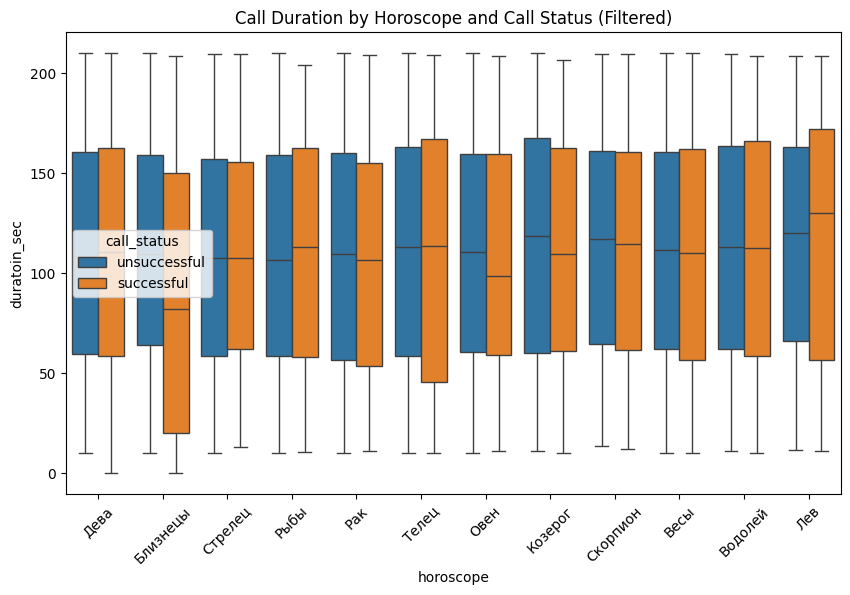

Test Levene, p-value: 0.5084654442377731
                                  df        sum_sq       mean_sq         F  \
C(horoscope)                    11.0  5.009701e+04   4554.273928  1.345758   
C(call_status)                   1.0  1.691734e+04  16917.337643  4.998963   
C(horoscope):C(call_status)     11.0  1.132611e+05  10296.462795  3.042538   
Residual                     21729.0  7.353462e+07   3384.169536       NaN   

                               PR(>F)  
C(horoscope)                 0.191772  
C(call_status)               0.025373  
C(horoscope):C(call_status)  0.000445  
Residual                          NaN  


In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Преобразование duratoin_sec в числовой формат

df['duratoin_sec'] = df['duratoin_sec'].str.replace(',', '.').astype(float)

# Исключение звонков с длительностью более 600 секунд
df_clean = df[df['duratoin_sec'] <= 600]

# Проверка нормальности для каждой группы (Шапиро-Уилк)
for sign in df_clean['horoscope'].unique():
    zodiac_data = df_clean[df_clean['horoscope'] == sign]['duratoin_sec']
    stat, p_value = stats.shapiro(zodiac_data)
    print(f'Horoscope: {sign}, p-value: {p_value}')

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.boxplot(x='horoscope', y='duratoin_sec', hue='call_status', data=df_clean)
plt.xticks(rotation=45)
plt.title('Call Duration by Horoscope and Call Status (Filtered)')
plt.show()

# Проверка гомогенности дисперсий (тест Левена)
stat, p_value = stats.levene(*[df_clean[df_clean['horoscope'] == sign]['duratoin_sec'] for sign in df_clean['horoscope'].unique()])
print(f'Test Levene, p-value: {p_value}')

# Если данные нормальны и дисперсии равны -> ANOVA
anova_model = ols('duratoin_sec ~ C(horoscope) * C(call_status)', data=df_clean).fit()
anova_table = anova_lm(anova_model)
print(anova_table)


Результаты теста Левена:

p-value: 0.508465: Это значение больше 0.05, что указывает на то, что мы не имеем достаточных оснований отвергнуть нулевую гипотезу о равенстве дисперсий. Это значит, что предположение о равенстве дисперсий для ANOVA выполнено.

Результаты ANOVA:

C(horoscope): p-value: 0.191772: Это значение больше 0.05, что указывает на то, что различия средних значений длительности звонков между знаками зодиака не являются статистически значимыми.
C(horoscope):C(call_status): p-value: 0.000445: Это значение меньше 0.05, что указывает на статистически значимое взаимодействие между знаком зодиака и статусом звонка. Это означает, что существует статистически значимая взаимосвязь между знаком зодиака и статусом звонка.


## Подсчет продажной конверсии для каждого управления, группы.

## Подсчёт наивысшей продажной конверсии по агентам

In [ ]:
%%sql DROP TABLE Count_Conversion_For_management;

 * sqlite:////content/data.db
(sqlite3.OperationalError) no such table: Count_Conversion_For_management
[SQL: DROP TABLE Count_Conversion_For_management;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
%%sql
CREATE TABLE Count_Conversion_For_management AS
SELECT
t1.source_system_cd,
t2.agent_login,
t2.finish_dttm AS finish_dttm_end_talk,
t3.hit_status_result_id,
t6.hit_status_result_desc,
t8.group_nm,
t9.management_nm,
t4.hid AS product_hid, -- Assuming you want to include the product ID
t4.using_flg AS product_using_flg -- If you want to include the using flag
FROM task t1
LEFT JOIN call t2 ON t1.task_rk = t2.wo_task_rk
LEFT JOIN action t3 ON t2.wo_hit_rk = t3.hit_rk
LEFT JOIN product t4 ON t3.hit_rk = t4.hit_rk -- Join with product to get product details
LEFT JOIN emp_x_org_gr t5 ON t2.wo_employee_rk = t5.employee_rk
LEFT JOIN result t6 ON t3.hit_status_result_id = t6.hit_status_result_id
LEFT JOIN "group" t8 ON t5.org_group_rk = t8.org_group_rk
LEFT JOIN mngmnt t9 ON t8.org_management_rk = t9.org_management_rk;

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
SELECT
    agent_login,
    group_nm,
    management_nm,
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS agent_ratio
FROM
    Count_Conversion_For_management
GROUP BY
    agent_login
HAVING
    Count_dialing_for_agent > 20 -- Минимальное количество звонков для отбора чтобы избежать дело случая
ORDER BY
    agent_ratio DESC;

 * sqlite:////content/data.db
Done.


agent_login,group_nm,management_nm,Count_dialing_for_agent,agent_ratio
yrovibna,Группа 17,Управление КЦ Керс,25,1.0
novamere,Группа 45,Управление КЦ Мазан,43,1.0
ninayuvd,Группа 2,Управление КЦ Хирс,25,1.0
movagsya,Группа 17,Управление КЦ Керс,36,1.0
lovazmba,Группа 17,Управление КЦ Керс,21,1.0
hhakevve,Группа 2,Управление КЦ Хирс,38,1.0
dinayuas,Группа 2,Управление КЦ Хирс,38,1.0
cyanrser,Группа 36,Управление КЦ Чизан,70,1.0
alkamgpa,Группа 2,Управление КЦ Хирс,25,1.0
stinmist,Группа 2,Управление КЦ Хирс,43,0.9286


Можно видеть что главенствующие позиции по продажной конверсии в основном занимают операторы из Керса и Хирса. В дальнейшем проверим продажную конверсию по управлениям и заметим что наивысшая продажная конверсия у этих управлений.

In [ ]:
result = %sql SELECT agent_login, group_nm, management_nm, COUNT(hit_status_result_id) AS Count_dialing_for_agent, ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 / NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS agent_ratio FROM Count_Conversion_For_management GROUP BY agent_login HAVING Count_dialing_for_agent ORDER BY agent_ratio DESC;
df_agent_ratio = result.DataFrame()
# Сохраняем в df для дальнейшего сохранения в excel

 * sqlite:////content/data.db
Done.


## Отбор операторов с наивысшей продажной конверсией по управлениям

In [ ]:
%%sql
CREATE TABLE temper AS
SELECT
    agent_login,
    group_nm,
    management_nm,
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS agent_ratio
FROM
    Count_Conversion_For_management
GROUP BY
    agent_login
HAVING
    Count_dialing_for_agent > 25
ORDER BY
    agent_ratio DESC;

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
SELECT agent_login, group_nm, management_nm, Count_dialing_for_agent, ROUND(MAX(agent_ratio),4) as agent_ratio
from temper
GROUP BY (management_nm)
ORDER BY MAX(agent_ratio) DESC

 * sqlite:////content/data.db
Done.


agent_login,group_nm,management_nm,Count_dialing_for_agent,agent_ratio
cyanrser,Группа 36,Управление КЦ Чизан,70,1.0
hhakevve,Группа 2,Управление КЦ Хирс,38,1.0
novamere,Группа 45,Управление КЦ Мазан,43,1.0
movagsya,Группа 17,Управление КЦ Керс,36,1.0
kovabzbe,Группа 15,Управление КЦ Шоколад,35,0.8333
novaarku,Группа 13,Управление КЦ Дирис,46,0.7692
aevaatta,Группа 41,Управление КЦ Парис,26,0.75
2968aiko,Группа 37,Управление КЦ Страница,42,0.7273
xinaaoma,Группа 6,Управление КЦ Ребус,33,0.7273
9569aosm,Группа 5,Управление КЦ Ромашка,47,0.6


In [ ]:
result = %sql SELECT agent_login, group_nm, management_nm, Count_dialing_for_agent, ROUND(MAX(agent_ratio),4) as agent_ratio from temper GROUP BY (management_nm) ORDER BY MAX(agent_ratio) DESC
df_agent_ratio_by_management = result.DataFrame()
# Сохраняем в df для дальнейшего сохранения в excel

 * sqlite:////content/data.db
Done.


## Отбор управлений и соответствующих групп с продажной конверсией по группам, конверсия по продуктам для каждой группы

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)  # Показывать все строки
pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.width', None)  # Установить ширину вывода в консоли
pd.set_option('display.max_colwidth', None)

# Получение данных из SQL (ваш исходный запрос)
result = %sql SELECT * FROM Count_Conversion_For_management;
df = result.DataFrame()

# Группировка данных по управлению, группе и hid (идентификатор продукта)
group_counts = df.groupby(['management_nm', 'group_nm', 'product_hid']).agg(
    Refuse=pd.NamedAgg(column='hit_status_result_id', aggfunc=lambda x: (x == 1).sum()),
    success=pd.NamedAgg(column='hit_status_result_id', aggfunc=lambda x: (x == 3).sum())
)

# Расчет конверсии продаж
group_counts['Sales_conversion'] = group_counts['success'] / (group_counts['Refuse'] + group_counts['success'])

# Удаление строк с NaN (если есть)
df_cleaned = group_counts.dropna()

# Переименование для ясности
df_management_group_hid_sales = df_cleaned

# Сначала добавим столбец с максимальными значениями Sales_conversion для каждого management_nm
df_management_group_hid_sales['max_sales_conversion'] = df_management_group_hid_sales.groupby('management_nm')['Sales_conversion'].transform('max')

# Сортировка по максимальным значениям Sales_conversion для management_nm,
# затем по значениям Sales_conversion для product_hid
df_management_group_hid_sales_sorted = df_management_group_hid_sales.sort_values(
    by=['max_sales_conversion', 'Sales_conversion'], ascending=[False, False]
).drop(columns='max_sales_conversion')  # Убираем временный столбец
# Вывести отсортированный DataFrame
df_management_group_hid_sales_sorted

 * sqlite:////content/data.db
Done.


<ipython-input-16-5bb15b5bfff1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_management_group_hid_sales['max_sales_conversion'] = df_management_group_hid_sales.groupby('management_nm')['Sales_conversion'].transform('max')


Refuse  success  Sales_conversion
management_nm          group_nm  product_hid                                   
Управление КЦ Супер    Группа 42 1                 0        1          1.000000
                                 4                75        5          0.062500
Управление КЦ Керс     Группа 17 1                21       52          0.712329
                                 4                85      195          0.696429
                                 3                 9       10          0.526316
                       Группа 38 1                30        9          0.230769
                                 4                40        9          0.183673
                                 2               110       22          0.166667
                       Группа 17 2                 1        0          0.000000
                       Группа 38 3                 3        0          0.000000
Управление КЦ Хирс     Группа 2  4                38       88          0.698413
                                 3                 3        6          0.666667
                                 1                65      101          0.608434
Управление КЦ Дилис    Группа 32 4                 8       13          0.619048
                                 3                 1        0          0.000000
Управление КЦ Ребус    Группа 6  1                38       56          0.595745
                                 4                69       63          0.477273
                                 3                 8        4          0.333333
                                 2                15        7          0.318182
                       Группа 46 1                24        3          0.111111
                                 2                43        5          0.104167
                                 4                32        2          0.058824
                                 3                 2        0          0.000000
Управление КЦ Пирс     Группа 1  1                 2        2          0.500000
Управление КЦ Сас      Группа 25 3                 1        1          0.500000
                                 1                16        4          0.200000
Управление КЦ Пирс     Группа 1  3                22        5          0.185185
                                 2               156       34          0.178947
Управление КЦ Сас      Группа 25 4                66        8          0.108108
Управление КЦ Пирс     Группа 1  4               118       14          0.106061
Управление КЦ Сас      Группа 25 2                58        3          0.049180
Управление КЦ Страница Группа 37 1                25       17          0.404762
                                 4                85       53          0.384058
                                 3                 5        3          0.375000
                                 2                 9        5          0.357143
                       Группа 23 1                44        4          0.083333
                                 4               679       56          0.076190
                                 2               170        7          0.039548
                                 3                 9        0          0.000000
Управление КЦ Казан    Группа 31 3                 8        5          0.384615
                                 4               209       34          0.139918
                                 1                23        3          0.115385
                                 2                74        8          0.097561
Управление КЦ Сеньор   Группа 50 4                 5        3          0.375000
                                 2               102       12          0.105263
                                 1                54        3          0.052632
                                 3                 6        0          0.000000
Управление КЦ Дирис    Группа 13 1                12        7          0.368421
                                 3            

Можно наблюдать что все управления продают одни и те же продукты +- продукты, и например у управления Керса и Хирса наивысшая продажная конверсия, при том у них в работе имеются все типа продуктов. Таким образом можно предполагать о том что продажная конверсия не сильно зависит от типа продукта. Тем не менее утверждать что продажная конверсия не зависит от типа продукта нельзя. Проверим существует ли статистически значимая зависимость между статусом звонка и типом продукта.


In [ ]:
df.head()

,source_system_cd,agent_login,finish_dttm_end_talk,hit_status_result_id,hit_status_result_desc,group_nm,management_nm,product_hid,product_using_flg
0,FW,movakaro,2022-08-25 16:13:02,5,Недозвон,Группа 16,Управление КЦ Сезам,4,NaN
1,GI,8306aava,2022-08-02 13:34:55,1,"Дозвон, Отказ",Группа 23,Управление КЦ Страница,4,NaN
2,GI,8251nsma,2022-08-08 22:07:29,1,"Дозвон, Отказ",Группа 36,Управление КЦ Чизан,3,NaN
3,GI,9185avis,2022-08-04 13:59:51,3,"Дозвон, Успешно",Группа 2,Управление КЦ Хирс,4,0.0
4,GI,tevapasa,2022-08-15 11:12:08,1,"Дозвон, Отказ",Группа 29,Управление КЦ Дирим,4,NaN


In [ ]:
from scipy.stats import chi2_contingency

# 1. Фильтр данных: оставить только "Дозвон, Успешно" и "Дозвон, Отказ"
filtered_df = df[df['hit_status_result_desc'].isin(['Дозвон, Успешно', 'Дозвон, Отказ'])]

# 2. Убедимся, что переменные категориальные
filtered_df['product_hid'] = filtered_df['product_hid'].astype('category')
filtered_df['hit_status_result_desc'] = filtered_df['hit_status_result_desc'].astype('category')

# 3. Создать таблицу сопряженности (контингентную таблицу)
contingency_table = pd.crosstab(filtered_df['product_hid'], filtered_df['hit_status_result_desc'])

# 4. Применить критерий хи-квадрат (Chi-Square Test)
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 5. Вывод результатов
print("Таблица сопряженности:")
print(contingency_table)
print("\nХи-квадрат:", chi2)
print("p-значение:", p)
print("Степени свободы:", dof)
print("\nОжидаемые значения:")
print(expected)


Таблица сопряженности:
hit_status_result_desc  Дозвон, Отказ  Дозвон, Успешно
product_hid                                           
1                                1466              429
2                                4714              586
3                                 868              168
4                               11411             2127

Хи-квадрат: 155.47112816081014
p-значение: 1.739423581551826e-33
Степени свободы: 3

Ожидаемые значения:
[[ 1606.86319996   288.13680004]
 [ 4494.12926639   805.87073361]
 [  878.47507924   157.52492076]
 [11479.53245441  2058.46754559]]


<ipython-input-21-b31a83f633bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['product_hid'] = filtered_df['product_hid'].astype('category')
<ipython-input-21-b31a83f633bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hit_status_result_desc'] = filtered_df['hit_status_result_desc'].astype('category')


Есть статистически значимая зависимость между типом продукта (product_hid) и результатом звонка (hit_status_result_desc).
Для некоторых типов продуктов вероятность успешного звонка выше или ниже ожидаемой:
Продукты 1, 3, и 4 имеют более высокую вероятность успешного звонка, чем ожидалось.
Продукт 2 имеет более низкую вероятность успешного звонка, чем ожидалось.

## Группы с наивысшей продажной конверсией в каждом управлении.

In [ ]:
%%sql
WITH Group_Conversion AS (
    SELECT
        group_nm,
        management_nm,
        COUNT(hit_status_result_id) AS Count_dialing_for_group,
        ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
        NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0), 4) AS group_nm_ratio
    FROM
        Count_Conversion_For_management
    GROUP BY
        group_nm, management_nm
    HAVING
        COUNT(hit_status_result_id) > 100
)
SELECT *
FROM (
    SELECT
        group_nm,
        management_nm,
        Count_dialing_for_group,
        group_nm_ratio,
        ROW_NUMBER() OVER (PARTITION BY management_nm ORDER BY group_nm_ratio DESC) AS rn
    FROM
        Group_Conversion
) AS ranked_groups
WHERE rn = 1
ORDER BY group_nm_ratio DESC;

 * sqlite:////content/data.db
Done.


group_nm,management_nm,Count_dialing_for_group,group_nm_ratio,rn
Группа 17,Управление КЦ Керс,1434,0.689,1
Группа 2,Управление КЦ Хирс,1274,0.6478,1
Группа 6,Управление КЦ Ребус,549,0.5,1
Группа 37,Управление КЦ Страница,672,0.3861,1
Группа 15,Управление КЦ Шоколад,1831,0.3075,1
Группа 13,Управление КЦ Дирис,2208,0.2638,1
Группа 9,Управление КЦ Чирис,142,0.1842,1
Группа 30,Управление КЦ Чизан,4633,0.182,1
Группа 1,Управление КЦ Пирс,1424,0.1558,1
Группа 41,Управление КЦ Парис,4350,0.1505,1


In [ ]:
result = %sql SELECT group_nm, management_nm, COUNT(hit_status_result_id) AS Count_dialing_for_group, ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 / NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS group_nm_ratio FROM Count_Conversion_For_management GROUP BY group_nm HAVING Count_dialing_for_group > 100 ORDER BY group_nm_ratio DESC;
df_group = result.DataFrame()
# Сохраняем в df для дальнейшего сохранения в excel

 * sqlite:////content/data.db
Done.


Также можно видеть что наивысшая продажная конверсия у групп с Керса и Хирса.

Группы с наивысшей продажной конверсией в каждом управлении.



In [ ]:
%%sql
SELECT
    group_nm,
    management_nm,
    COUNT(hit_status_result_id) AS Count_dialing_for_management,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS management_nm_ratio
FROM
    Count_Conversion_For_management
GROUP BY
    management_nm
ORDER BY management_nm_ratio DESC;

 * sqlite:////content/data.db
Done.


group_nm,management_nm,Count_dialing_for_management,management_nm_ratio
Группа 2,Управление КЦ Хирс,1274,0.6478405315614618
Группа 32,Управление КЦ Дилис,58,0.5909090909090909
Группа 17,Управление КЦ Керс,2361,0.4983221476510067
Группа 6,Управление КЦ Ребус,802,0.37735849056603776
Группа 15,Управление КЦ Шоколад,1831,0.3075060532687651
Группа 13,Управление КЦ Дирис,2208,0.2637931034482759
Группа 9,Управление КЦ Чирис,142,0.18421052631578946
Группа 36,Управление КЦ Чизан,21381,0.17183488050562906
Группа 44,Управление КЦ Чирим,47,0.16666666666666666
Группа 12,Управление КЦ Варис,69,0.16666666666666666


Управления с наивысшей продажной конверсией. Можно видеть, что наиболее высокие показатели показыват Керс и Хирс. Дилис в расчёт не берем из-за малого количества звонков. Хуже всего себя показали Неп и Тазан. При таком количестве звонков показатели продажной конверсии у них не высоки. Остальные управления с низкими показателями продажной конверсии имеют не очень большое количество звонков и возможно в будущем они проявят себя лучше. Интересная деталь заключается в том,  что увеличение количества звонков заставляет стремиться продажную конверсию к ≈ 0,15. Это хорошо видно для случая с девами, а также это видно для случая управления Чизан.

In [ ]:
result = %sql SELECT management_nm, COUNT(hit_status_result_id) AS Count_dialing_for_management, SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 / NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS management_nm_ratio FROM Count_Conversion_For_management GROUP BY management_nm ORDER BY management_nm_ratio DESC;

 * sqlite:////content/data.db
Done.


In [ ]:
df_management = result.DataFrame()

In [ ]:
%%sql
SELECT *
FROM
    Count_Conversion_For_management
WHERE management_nm = "Управление КЦ Вирс"

 * sqlite:////content/data.db
Done.


source_system_cd,agent_login,finish_dttm_end_talk,hit_status_result_id,hit_status_result_desc,group_nm,management_nm
GI,ajloagxo,2022-08-12 10:53:48,5,Недозвон,Группа 4,Управление КЦ Вирс
FW,5275masi,2022-08-16 16:38:24,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,ajloagxo,2022-08-15 14:22:50,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,9694eaav,2022-08-01 14:43:10,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,nayaispo,2022-08-02 12:21:20,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,nayaispo,2022-08-31 17:01:28,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,chukkima,2022-08-25 11:43:04,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,chukkima,2022-08-17 17:03:36,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,sovalmbo,2022-08-04 10:30:44,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,sovalmbo,2022-08-05 12:01:52,5,Недозвон,Группа 4,Управление КЦ Вирс


Проверяю почему для управления Вирс нет значений. По какой-то причине результат звонка у них всегда "Недозвон". Маловероятно, что эта аномалия связана со случайностью, вероятно какой-то сбой в системе.

In [ ]:
result = %sql SELECT * FROM Count_Conversion_For_management WHERE management_nm = "Управление КЦ Вирс";
df_virs = result.DataFrame()
df_

 * sqlite:////content/data.db
Done.


In [ ]:
%%sql
SELECT *
FROM
    Count_Conversion_For_management
WHERE management_nm = "Управление КЦ Вазан"

 * sqlite:////content/data.db
Done.


agent_login,hit_status_result_id,hit_status_result_desc,group_nm,management_nm
tyanazha,5,Недозвон,Группа 39,Управление КЦ Вазан
tyanazha,5,Недозвон,Группа 39,Управление КЦ Вазан
tyanazha,6,"Дозвон, Отложить",Группа 39,Управление КЦ Вазан


Проверяю почему для управления Вазан нет значений. Здесь всё прозаично, если Управление КЦ Вазан только открылся, то причина ясна. Или же данные об их звонках не были загружены в БД.

In [ ]:
result = %sql SELECT * FROM Count_Conversion_For_management WHERE management_nm = "Управление КЦ Вазан";
df_kazan = result.DataFrame()

 * sqlite:////content/data.db
Done.


## Поиск трендов. Зависимость продажной конверсии от дня недели и времени суток. Зависимость "утилизации" клиента от дня недели.


In [6]:
%%sql
CREATE TABLE T AS
SELECT
    r.hit_status_result_id,
    c.finish_dttm as finish_dttm_end_talk
FROM
    call c
LEFT JOIN
    action r ON c.wo_hit_rk = r.hit_rk
WHERE
    r.hit_status_result_id IN (1,3);

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
CREATE TABLE Sales_Conversion_Per_Hour AS
SELECT
    strftime('%H', finish_dttm_end_talk) AS hour_of_day,
    CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversion,
    COUNT(hit_status_result_id) as Count_Dialings
FROM T
WHERE hit_status_result_id IN (1, 3)
GROUP BY hour_of_day

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql SELECT hour_of_day, ROUND(Sales_Conversion,3) AS Sales_Conversion, Count_Dialings FROM Sales_Conversion_Per_Hour

 * sqlite:////content/data.db
Done.


hour_of_day,Sales_Conversion,Count_Dialings
03,0.0,1
04,0.219,32
05,0.282,85
06,0.113,194
07,0.18,334
08,0.121,1367
09,0.138,1548
10,0.134,2534
11,0.155,2659
12,0.146,2407


 * sqlite:////content/data.db
Done.


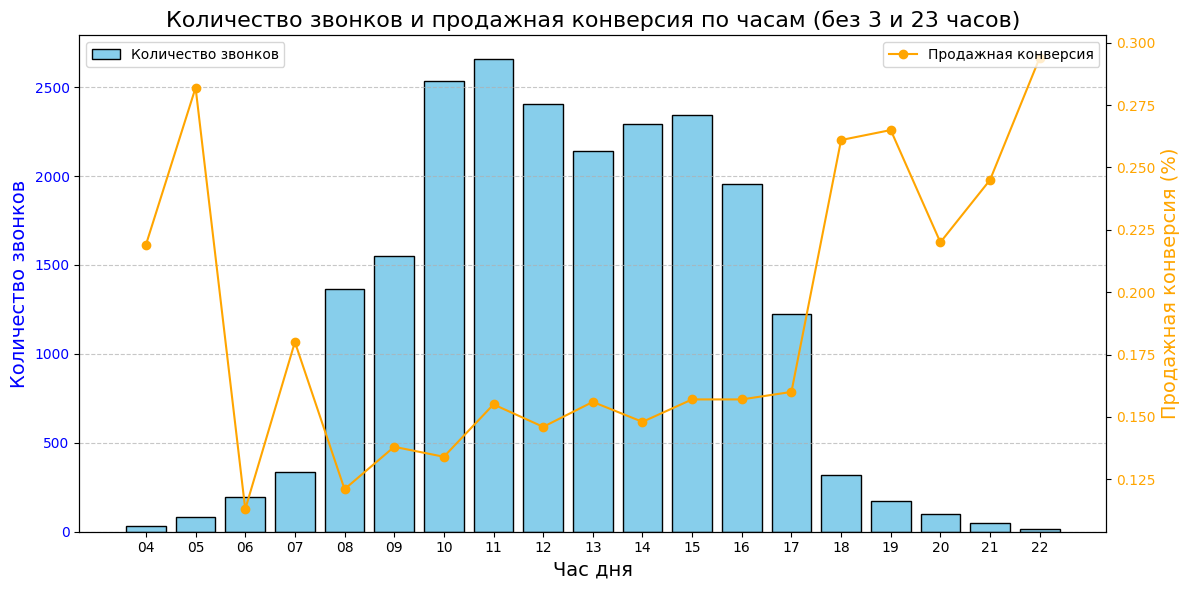

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = %sql SELECT hour_of_day, ROUND(Sales_Conversion,3) AS Sales_Conversion, Count_Dialings FROM Sales_Conversion_Per_Hour;
# Преобразуем результат SQL-запроса в pandas DataFrame
data_df = data.DataFrame()  # Если `data` — результат магии `%sql`, преобразуем его в DataFrame

# Фильтрация: исключаем 3 и 23 часы
data_df = data_df[(data_df['hour_of_day'] != '03') & (data_df['hour_of_day'] != '23')]

# Создаем фигуру и оси для комбинированного графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Гистограмма количества звонков (основная ось Y)
ax1.bar(data_df['hour_of_day'], data_df['Count_Dialings'], color='skyblue', edgecolor='black', label='Количество звонков')
ax1.set_xlabel('Час дня', fontsize=14)
ax1.set_ylabel('Количество звонков', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')  # Устанавливаем цвет подписей оси Y для звонков
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Линия продажной конверсии (вторая ось Y)
ax2 = ax1.twinx()  # Создаем вторую ось Y
ax2.plot(data_df['hour_of_day'], data_df['Sales_Conversion'], color='orange', marker='o', label='Продажная конверсия')
ax2.set_ylabel('Продажная конверсия (%)', fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')  # Устанавливаем цвет подписей оси Y для конверсии

# Заголовок и настройка графика
plt.title('Количество звонков и продажная конверсия по часам (без 3 и 23 часов)', fontsize=16)
fig.tight_layout()  # Устраняет проблемы с наложением подписей

# Легенда
ax1.legend(loc='upper left')  # Легенда для гистограммы
ax2.legend(loc='upper right')  # Легенда для линейного графика

# Показать график
plt.show()

Видно что в ночное время звонков значительно меньше чем в дневное, но выше продажная конверсия. Видно что продажная конверсия выше от 6 вечера до 5 утра. Необходимо исследовать почему так происходит.

In [ ]:
result_for_hour = %sql SELECT strftime('%H', finish_dttm_end_talk) AS hour_of_day, CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversion, COUNT(hit_status_result_id) as Count_Dialings FROM T WHERE hit_status_result_id IN (1, 3) GROUP BY hour_of_day
df_result_for_hour  = result_for_hour.DataFrame()
df = df.drop([0, len(df)-1])
df['hour_of_day'] = df['hour_of_day'].astype(int)

 * sqlite:////content/data.db
Done.


Видно что продажная конверсия выше от 6 вечера до 5 утра. Необходимо исследовать почему так происходит.

Ставлю гипотезу, что люди в ночное и утреннее время охотнее берут трубку. Также проверю эту гипотезу для выходных.

In [ ]:
%%sql
SELECT
    'Weekend' AS Period,
    ROUND((COUNT(CASE WHEN strftime('%w', finish_dttm_end_talk) IN ('0', '6') AND hit_status_result_id = 5 THEN 1 END) * 100.0) /
          COUNT(CASE WHEN strftime('%w', finish_dttm_end_talk) IN ('0', '6') THEN 1 END), 2) AS Success_Percentage,
    COUNT(CASE WHEN strftime('%w', finish_dttm_end_talk) IN ('0', '6') THEN 1 END) AS Total_Calls
FROM Count_Conversion_For_management

UNION ALL

SELECT
    'Weekday' AS Period,
    ROUND((COUNT(CASE WHEN strftime('%w', finish_dttm_end_talk) NOT IN ('0', '6') AND hit_status_result_id = 5 THEN 1 END) * 100.0) /
          COUNT(CASE WHEN strftime('%w', finish_dttm_end_talk) NOT IN ('0', '6') THEN 1 END), 2) AS Success_Percentage,
    COUNT(CASE WHEN strftime('%w', finish_dttm_end_talk) NOT IN ('0', '6') THEN 1 END) AS Total_Calls
FROM Count_Conversion_For_management

UNION ALL

SELECT
    'Daytime (06-17)' AS Period,
    ROUND((COUNT(CASE WHEN strftime('%H', finish_dttm_end_talk) BETWEEN '06' AND '17' AND hit_status_result_id = 5 THEN 1 END) * 100.0) /
          COUNT(CASE WHEN strftime('%H', finish_dttm_end_talk) BETWEEN '06' AND '17' THEN 1 END), 2) AS Success_Percentage,
    COUNT(CASE WHEN strftime('%H', finish_dttm_end_talk) BETWEEN '06' AND '17' THEN 1 END) AS Total_Calls
FROM Count_Conversion_For_management

UNION ALL

SELECT
    'Nighttime (18-05)' AS Period,
    ROUND((COUNT(CASE WHEN (strftime('%H', finish_dttm_end_talk) NOT BETWEEN '06' AND '17') AND hit_status_result_id = 5 THEN 1 END) * 100.0) /
          COUNT(CASE WHEN (strftime('%H', finish_dttm_end_talk) NOT BETWEEN '06' AND '17') THEN 1 END), 2) AS Success_Percentage,
    COUNT(CASE WHEN (strftime('%H', finish_dttm_end_talk) NOT BETWEEN '06' AND '17') THEN 1 END) AS Total_Calls
FROM Count_Conversion_For_management;

 * sqlite:////content/data.db
Done.


Period,Success_Percentage,Total_Calls
Weekend,53.71,3208
Weekday,56.69,85966
Daytime (06-17),56.63,86052
Nighttime (18-05),55.29,3122


In [ ]:
import scipy.stats as stats
import math

# Данные из SQL-запроса
data = {
    'Period': ['Weekend', 'Weekday', 'Daytime', 'Nighttime'],
    'Success_Percentage': [53.71, 56.69, 56.63, 55.29],
    'Total_Calls': [3208, 	85966, 	86052, 4000]
}

from scipy.stats import chi2_contingency

# Извлечение данных из словаря
periods = data['Period']
success_percentages = data['Success_Percentage']
total_calls = data['Total_Calls']

# Создание таблицы сопряженности
contingency_table = [
    [total_calls[2] * success_percentages[2] / 100, total_calls[2] * (100 - success_percentages[2]) / 100],
    [total_calls[3] * success_percentages[3] / 100, total_calls[3] * (100 - success_percentages[3]) / 100]
]

# Проведение теста хи-квадрат
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Вывод результатов
print("Таблица сопряженности:")
print(contingency_table)
print(f"Значение хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p_value:.4f}")

# Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Гипотеза отвергается. Есть значимая разница между успешностью звонков в дневное и ночное время.")
else:
    print("Гипотеза не может быть отвергнута. Нет значимой разницы между успешностью звонков в дневное и ночное время.")

Таблица сопряженности:
[[48731.247599999995, 37320.7524], [2211.6, 1788.4]]
Значение хи-квадрат: 2.74
p-значение: 0.0979
Гипотеза не может быть отвергнута. Нет значимой разницы между успешностью звонков в дневное и ночное время.


In [ ]:
from scipy.stats import chi2_contingency

# Извлечение данных из словаря
periods = data['Period']
success_percentages = data['Success_Percentage']
total_calls = data['Total_Calls']

# Создание таблицы сопряженности
contingency_table = [
    [total_calls[0] * success_percentages[0] / 100, total_calls[0] * (100 - success_percentages[0]) / 100],
    [total_calls[1] * success_percentages[1] / 100, total_calls[1] * (100 - success_percentages[1]) / 100]
]

# Проведение теста хи-квадрат
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Вывод результатов
print("Таблица сопряженности:")
print(contingency_table)
print(f"Значение хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p_value:.4f}")

# Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Гипотеза отвергается. Есть значимая разница между успешностью звонков в выходные и будние дни.")
else:
    print("Гипотеза не может быть отвергнута. Нет значимой разницы между успешностью звонков в выходные и будние дни.")

Таблица сопряженности:
[[1723.0167999999999, 1484.9832000000001], [48734.1254, 37231.8746]]
Значение хи-квадрат: 11.06
p-значение: 0.0009
Гипотеза отвергается. Есть значимая разница между успешностью звонков в выходные и будние дни.


Видно что результат взятия трубки не зависит от времени суток. Тем не менее есть статистически значимая разница между поднятием трубки в выходные дни и будние дни, тем не менее разница составляет всего три процента.

Возможно операторы работающие в это время имеют наиболее высокую продажную конверсию в целом, чем только те кто работает по будням и в дневное время. Возможно, что это связано с тем что операторы работающие в это время наиболее мотивированы и имеют хороший навык продажи.  

In [ ]:
%%sql
WITH Agent_Working_Status AS (
    SELECT
        agent_login,
        CASE
            WHEN SUM(CASE WHEN strftime('%w', finish_dttm_end_talk) IN ('0', '6') THEN 1 ELSE 0 END) > 0
            THEN 'Weekend_Worker' -- Операторы, работающие в выходные
            ELSE 'Weekday_Only_Worker' -- Операторы, работающие только в будние дни
        END AS Agent_Type
    FROM
        Count_Conversion_For_management
    GROUP BY
        agent_login
)
SELECT
    aws.Agent_Type,
    COUNT(cfm.hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN cfm.hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN cfm.hit_status_result_id IN (1, 3) THEN 1 ELSE 0 END), 0) AS Sales_Conversion
FROM
    Count_Conversion_For_management cfm
JOIN
    Agent_Working_Status aws
    ON cfm.agent_login = aws.agent_login
GROUP BY
    aws.Agent_Type;

 * sqlite:////content/data.db
Done.


Agent_Type,Count_dialing_for_agent,Sales_Conversion
Weekday_Only_Worker,52214,0.12909118587304003
Weekend_Worker,36960,0.18700034758428918


In [ ]:
from scipy.stats import chi2_contingency

# Исходные данные
data = {
    'Agent_Type': ['Weekday_Only_Worker', 'Weekend_Worker'],
    'Count_dialing_for_agent': [52214, 36960],
    'Sales_Conversion': [0.12909118587304003, 0.18700034758428918]
}

# Извлечение данных из словаря
agent_types = data['Agent_Type']
total_calls = data['Count_dialing_for_agent']
sales_conversion = data['Sales_Conversion']

# Создание таблицы сопряженности
contingency_table = [
    [total_calls[0] * sales_conversion[0], total_calls[0] * (1 - sales_conversion[0])],
    [total_calls[1] * sales_conversion[1], total_calls[1] * (1 - sales_conversion[1])]
]

# Проведение теста хи-квадрат
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Вывод результатов
print("Таблица сопряженности:")
print(contingency_table)
print(f"Значение хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p_value:.4f}")

# Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Гипотеза отвергается. Есть значимая разница между конверсией продаж у 'Weekday_Only_Worker' и 'Weekend_Worker'.")
else:
    print("Гипотеза не может быть отвергнута. Нет значимой разницы между конверсией продаж у 'Weekday_Only_Worker' и 'Weekend_Worker'.")

Таблица сопряженности:
[[6740.367179174912, 45473.632820825085], [6911.532846715329, 30048.467153284673]]
Значение хи-квадрат: 559.29
p-значение: 0.0000
Гипотеза отвергается. Есть значимая разница между конверсией продаж у 'Weekday_Only_Worker' и 'Weekend_Worker'.


Видно что операторы которые работают не только в будни имеют наиболее высокую продажную конверсию.

In [ ]:
%%sql
WITH Agent_Working_Status AS (
    SELECT
        agent_login,
        CASE
            WHEN agent_login IN (
                SELECT DISTINCT agent_login
                FROM Count_Conversion_For_management
                WHERE strftime('%H', finish_dttm_end_talk) BETWEEN '17' AND '23'
                   OR strftime('%H', finish_dttm_end_talk) BETWEEN '00' AND '05'
            ) THEN 'Evening_or_Night_Worker'
            ELSE 'Daytime_Only_Worker'
        END AS Agent_Type
    FROM
        Count_Conversion_For_management
    GROUP BY
        agent_login
)
SELECT
    aws.Agent_Type,
    COUNT(cfm.hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN cfm.hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN cfm.hit_status_result_id IN (1, 3) THEN 1 ELSE 0 END), 0) AS Sales_Conversion
FROM
    Count_Conversion_For_management cfm
JOIN
    Agent_Working_Status aws
    ON cfm.agent_login = aws.agent_login
GROUP BY
    aws.Agent_Type;

 * sqlite:////content/data.db
Done.


Agent_Type,Count_dialing_for_agent,Sales_Conversion
Daytime_Only_Worker,23235,0.12198739340007415
Evening_or_Night_Worker,65939,0.16195419847328243


In [ ]:
from scipy.stats import chi2_contingency

# Исходные данные
data = {
    'Agent_Type': ['Daytime_Only_Worker', 'Evening_or_Night_Worker'],
    'Count_dialing_for_agent': [23235, 65939],
    'Sales_Conversion': [0.12198739340007415, 0.16195419847328243]
}

# Извлечение данных из словаря
agent_types = data['Agent_Type']
total_calls = data['Count_dialing_for_agent']
sales_conversion = data['Sales_Conversion']

# Создание таблицы сопряженности
contingency_table = [
    [total_calls[0] * sales_conversion[0], total_calls[0] * (1 - sales_conversion[0])],
    [total_calls[1] * sales_conversion[1], total_calls[1] * (1 - sales_conversion[1])]
]

# Проведение теста хи-квадрат
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Вывод результатов
print("Таблица сопряженности:")
print(contingency_table)
print(f"Значение хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p_value:.4f}")

# Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Гипотеза отвергается. Есть значимая разница между конверсией продаж у 'Daytime_Only_Worker' и 'Evening_or_Night_Worker'.")
else:
    print("Гипотеза не может быть отвергнута. Нет значимой разницы между конверсией продаж у 'Daytime_Only_Worker' и 'Evening_or_Night_Worker'.")

Таблица сопряженности:
[[2834.377085650723, 20400.62291434928], [10679.09789312977, 55259.902106870235]]
Значение хи-квадрат: 213.13
p-значение: 0.0000
Гипотеза отвергается. Есть значимая разница между конверсией продаж у 'Daytime_Only_Worker' и 'Evening_or_Night_Worker'.


Для времени суток можно сделать такой же вывод.

Вероятней всего продажная конверсия в ночное время суток выше из-за того что ночью звонят наиболее опытные и мотивированные операторы, а также клиенты в это время суток наиболее склонны к покупкам ввиду их усталости. Тоже самое можно сказать и про выходные дни.

 * sqlite:////content/data.db
Done.


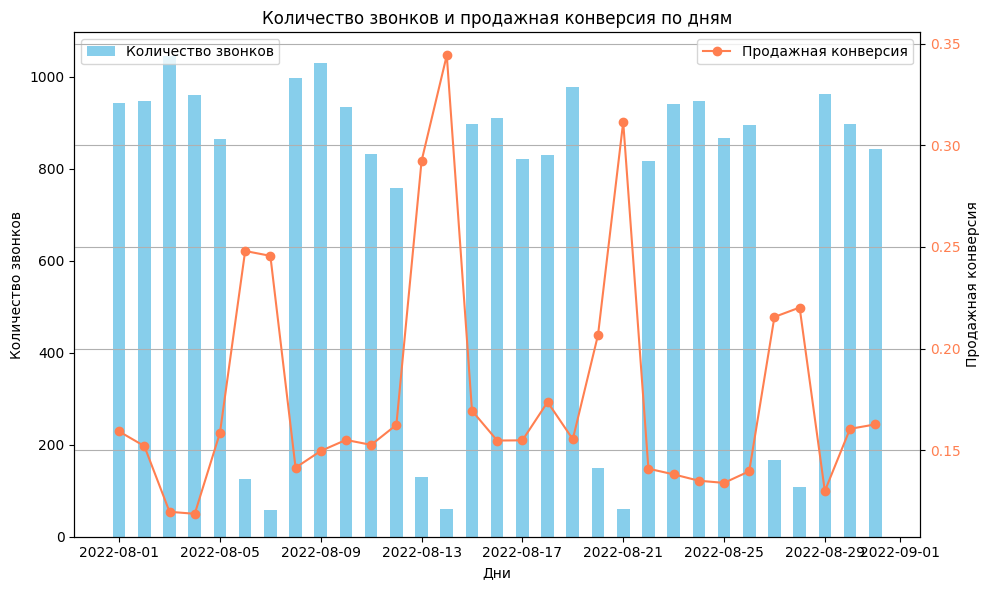

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
result = %sql SELECT DATE(finish_dttm_end_talk) AS day,CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversions, COUNT(hit_status_result_id) AS Count_Dialings FROM T WHERE hit_status_result_id IN (1, 3) GROUP BY DATE(finish_dttm_end_talk);
df = result.DataFrame()


df['day'] = pd.to_datetime(df['day'])

fig, ax1 = plt.subplots(figsize=(10, 6))

# Гистограмма для количества звонков
ax1.bar(df['day'], df['Count_Dialings'], color='skyblue', label='Количество звонков', width=0.5)
ax1.set_xlabel('Дни')
ax1.set_ylabel('Количество звонков')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Создаем вторую ось Y для конверсии
ax2 = ax1.twinx()
ax2.plot(df['day'], df['Sales_Conversions'], color='coral', marker='o', label='Продажная конверсия')
ax2.set_ylabel('Продажная конверсия')
ax2.tick_params(axis='y', labelcolor='coral')
ax2.legend(loc='upper right')

plt.title('Количество звонков и продажная конверсия по дням')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# 1. Добавление столбца с типом дня недели (будний/выходной)
df['day_type'] = df['day'].dt.dayofweek.apply(lambda x: 'weekday' if x < 5 else 'weekend')

# 2. Группировка данных по типу дня и суммирование
agg_df = df.groupby('day_type').agg({'Count_Dialings': 'sum'})

# 3. Расчет общего количества успешных звонков для каждого типа дня
df['successful_calls'] = (df['Sales_Conversions'] * df['Count_Dialings']).astype(int)
agg_df['successful_calls'] = df.groupby('day_type')['successful_calls'].sum()


# 4. Расчет конверсии на основе агрегированных данных
agg_df['conversion'] = agg_df['successful_calls'] / agg_df['Count_Dialings']

# 5. Создание таблицы сопряженности
contingency_table = [
    [agg_df.loc['weekday', 'successful_calls'], agg_df.loc['weekday', 'Count_Dialings'] - agg_df.loc['weekday', 'successful_calls']],
    [agg_df.loc['weekend', 'successful_calls'], agg_df.loc['weekend', 'Count_Dialings'] - agg_df.loc['weekend', 'successful_calls']]
]

# 6. Проведение теста хи-квадрат
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# 7. Вывод результатов
print("Агрегированные данные по типу дня:")
print(agg_df)
print("\nТаблица сопряженности:")
print(contingency_table)
print(f"\nЗначение хи-квадрат: {chi2:.2f}")
print(f"p-значение: {p_value:.4f}")

# 8. Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("\nГипотеза отвергается. Есть значимая разница между конверсией продаж в будние и выходные дни.")
else:
    print("\nГипотеза не может быть отвергнута. Нет значимой разницы между конверсией продаж в будние и выходные дни.")

Агрегированные данные по типу дня:
          Count_Dialings  successful_calls  conversion
day_type                                              
weekday            20909              3094    0.147975
weekend              860               214    0.248837

Таблица сопряженности:
[[3094, 17815], [214, 646]]

Значение хи-квадрат: 64.43
p-значение: 0.0000

Гипотеза отвергается. Есть значимая разница между конверсией продаж в будние и выходные дни.


Видно, что в субботу и воскрсенье наиболее высокая продажная конверсия. Это может быть связано с тем, как было сказано ранее, в это время звонят наиболее опытные и мотивированные операторы. А также можно предположить, что люди в выходные дни наиболее склонны к покупкам. Ну или же это может быть, как и в случае с ночным временем суток, влияние малого количества звонков по сравнению с будними днями.

In [ ]:
%%sql
SELECT
    STRFTIME('%Y-%W', finish_dttm_end_talk) AS year_week,
    CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversions
FROM T
WHERE hit_status_result_id IN (1, 3)
GROUP BY year_week;


 * sqlite:////content/data.db
Done.


year_week,Sales_Conversions
2022-31,0.1447661469933185
2022-32,0.15798354777473106
2022-33,0.16487300904003444
2022-34,0.1421341206242092
2022-35,0.15031469825990373


В случае с неделями в месяце особой разницы нет.

In [ ]:
result = %sql SELECT call.finish_dttm as finish_dttm_end_talk, action.hit_status_result_id, product.hid FROM call LEFT JOIN action ON call.wo_hit_rk = action.hit_rk LEFT JOIN product ON call.wo_hit_rk = product.hit_rk WHERE action.hit_status_result_id = 1 OR action.hit_status_result_id = 3 ORDER BY finish_dttm_end_talk

 * sqlite:////content/data.db
Done.


Посмотрим среднее время ожидания очереди для каждой очереди.

In [ ]:
%%sql
SELECT q.queue_id, q.queue_desc,
       ROUND(AVG(
           STRFTIME('%s', DATETIME(c.finish_dttm)) - STRFTIME('%s', DATETIME(t.create_dttm))
       ),1) AS avg_wait_time_second,
      COUNT(DISTINCT c.wo_task_rk) AS task_count
FROM queue q
LEFT JOIN call c ON q.queue_id = c.wo_queue_id
LEFT JOIN task t ON c.wo_task_rk = t.task_rk
GROUP BY q.queue_id, q.queue_desc
HAVING COUNT(DISTINCT c.wo_task_rk) > 30  -- Выбираем только строки, в которых queue_desc встречается более 30 раз
ORDER BY avg_wait_time_second DESC;

 * sqlite:////content/data.db
Done.


queue_id,queue_desc,avg_wait_time_second,task_count
13137,Очередь 2,2800755.2,89
9450,Очередь 107,2604529.5,71
4874,Очередь 76,1637284.4,112
12728,Очередь 63,1604874.9,398
12049,Очередь 86,1474161.1,216
2221,Очередь 33,1380272.5,342
14790,Очередь 23,1367519.2,1936
14354,Очередь 58,1239633.3,1825
15085,Очередь 75,1177661.7,681
4875,Очередь 5,1165806.4,192


Отобрал очереди которые встречаются более-менее часто. Видно, что некоторые очереди занимают продолжительные промежутки времени. Если это не связано с их спецификой, то возможна их оптимизация и выделение на них большего количества ресурсов.

In [ ]:
result = %sql SELECT q.queue_id, q.queue_desc, ROUND(AVG(STRFTIME('%s', DATETIME(c.finish_dttm)) - STRFTIME('%s', DATETIME(t.create_dttm))),1) AS avg_wait_time_second, COUNT(DISTINCT c.wo_task_rk) AS task_count FROM queue q LEFT JOIN call c ON q.queue_id = c.wo_queue_id LEFT JOIN task t ON c.wo_task_rk = t.task_rk GROUP BY q.queue_id, q.queue_desc HAVING COUNT(DISTINCT c.wo_task_rk) > 30   ORDER BY avg_wait_time_second DESC;

 * sqlite:////content/data.db
Done.


In [ ]:
df_queue = result.DataFrame()

In [ ]:
%%sql
SELECT task_stage_id, COUNT(*) AS stage_count
FROM task
GROUP BY task_stage_id
ORDER BY stage_count DESC;

 * sqlite:////content/data.db
Done.


task_stage_id,stage_count
1.0,39173
23.0,7909
None,2366
17.0,218
6.0,175
3.0,105
18.0,38
4.0,12
16.0,3
20.0,1


Наиболее популярные задачи

In [ ]:
%%sql
SELECT
  task_stage_id,
  AVG(julianday(finish_dttm) - julianday(create_dttm)) AS avg_duration_days
FROM
  task
GROUP BY
  task_stage_id;

 * sqlite:////content/data.db
Done.


task_stage_id,avg_duration_days
None,4.243054405976219
1.0,13.31990610235959
3.0,None
4.0,None
6.0,1.5094270831905305
16.0,None
17.0,None
18.0,None
20.0,None
23.0,10.967098315676914


По какой-то прочиние отсутсвует какой-то task, а также для большинства task'ов невозможно подсчитать среднее время от начала до завершения.

In [ ]:
%%sql
SELECT
  COUNT(*) AS null_count
FROM
  task
WHERE
  task_stage_id IN (4, 16, 17, 18, 20, 3)
  AND finish_dttm IS NULL;

 * sqlite:////content/data.db
Done.


null_count
377


In [ ]:
%%sql
SELECT
  task_stage_id, create_dttm, finish_dttm
FROM
  task
WHERE task_stage_id = 4 OR task_stage_id = 16 OR task_stage_id = 17 OR task_stage_id = 18 OR task_stage_id = 20 OR task_stage_id = 3

 * sqlite:////content/data.db
Done.


task_stage_id,create_dttm,finish_dttm
18.0,2022-08-25 09:05:53,None
3.0,2022-08-27 01:16:41,None
17.0,2022-08-10 16:50:47,None
3.0,2022-08-28 01:20:04,None
17.0,2022-08-01 13:55:14,None
17.0,2022-08-09 15:40:04,None
18.0,2022-08-26 09:32:07,None
3.0,2022-08-30 01:27:37,None
17.0,2022-08-31 16:40:50,None
4.0,2022-07-31 12:35:00,None


In [ ]:
result = %sql SELECT task_stage_id, create_dttm, finish_dttm FROM task WHERE task_stage_id = 4 OR task_stage_id = 16 OR task_stage_id = 17 OR task_stage_id = 18 OR task_stage_id = 20 OR task_stage_id = 3

 * sqlite:////content/data.db
Done.


In [ ]:
df_null_task = result.DataFrame()

Можно наблюдать аномалию, у задач 4, 16, 17, 18, 20, 3 отсуствует время окончания выполнения. Больше похоже на ошибку в системе.

Изучим количество различных задач по дням.

In [ ]:
result = %sql SELECT DATE(create_dttm) AS task_date, task_stage_id, COUNT(*) AS task_count FROM task WHERE task_stage_id IN ( 6, 4, 16, 17, 18, 20, 3) GROUP BY task_date, task_stage_id ORDER BY task_date, task_stage_id;

 * sqlite:////content/data.db
Done.


In [ ]:
df_task_by_days = result.DataFrame()

In [ ]:
df

,task_date,task_stage_id,task_count
0,2021-03-07,4.0,1
1,2021-04-08,4.0,1
2,2021-11-02,6.0,1
3,2021-11-24,4.0,1
4,2022-03-20,4.0,1
...,...,...,...
114,2022-08-31,3.0,2
115,2022-08-31,4.0,1
116,2022-08-31,6.0,5
117,2022-08-31,17.0,8


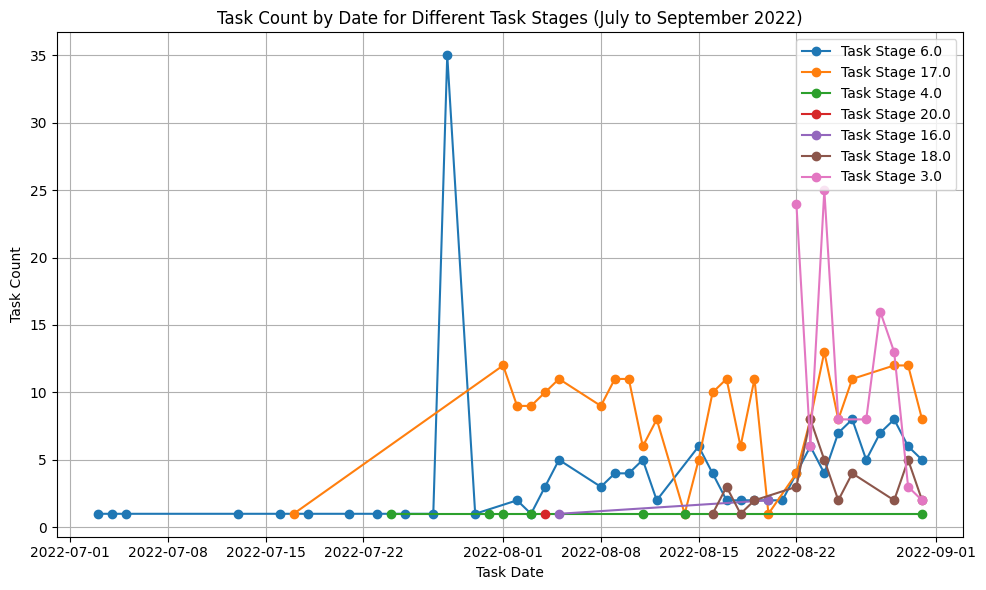

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
unique_task_stage_ids = df['task_stage_id'].unique()
df['task_date'] = pd.to_datetime(df['task_date'])


start_date = '2022-07-01'
end_date = '2022-09-30'

filtered_df = df[(df['task_date'] >= start_date) & (df['task_date'] <= end_date)]
unique_task_stage_ids = filtered_df['task_stage_id'].unique()
plt.figure(figsize=(10, 6))

for task_stage_id in unique_task_stage_ids:
    filtered_stage_df = filtered_df[filtered_df['task_stage_id'] == task_stage_id].copy()
    plt.plot(filtered_stage_df['task_date'], filtered_stage_df['task_count'], marker='o', label=f'Task Stage {task_stage_id}')


plt.title('Task Count by Date for Different Task Stages (July to September 2022)')
plt.xlabel('Task Date')
plt.ylabel('Task Count')


plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()

По какой-то причине 29 июля резко идёт скачок 6 задания. Кроме того, после этого дня резко возрастает количество всех задач. Похоже на аномалию, связанную с неполнотой данных.

In [ ]:
result = %sql SELECT DATE(create_dttm) AS task_date, task_stage_id, COUNT(*) AS task_count FROM task WHERE task_stage_id IN (1, 23) GROUP BY task_date, task_stage_id ORDER BY task_date, task_stage_id;

 * sqlite:////content/data.db
Done.


In [ ]:
df_task_by_days_1_23 = result.DataFrame()

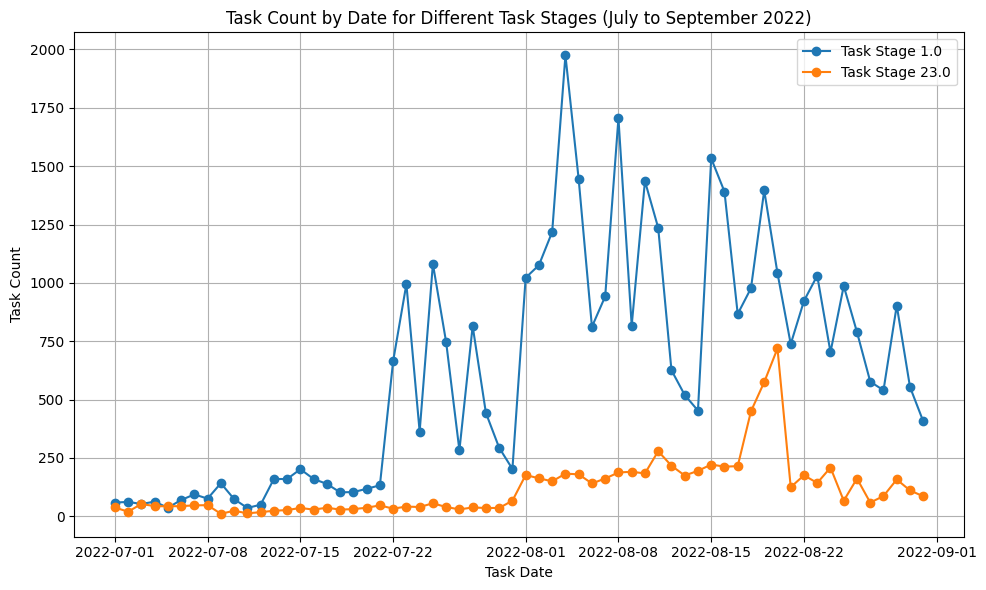

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
unique_task_stage_ids = df['task_stage_id'].unique()
df['task_date'] = pd.to_datetime(df['task_date'])


start_date = '2022-07-01'
end_date = '2022-09-30'

filtered_df = df[(df['task_date'] >= start_date) & (df['task_date'] <= end_date)]
unique_task_stage_ids = filtered_df['task_stage_id'].unique()
plt.figure(figsize=(10, 6))

for task_stage_id in unique_task_stage_ids:
    filtered_stage_df = filtered_df[filtered_df['task_stage_id'] == task_stage_id].copy()
    plt.plot(filtered_stage_df['task_date'], filtered_stage_df['task_count'], marker='o', label=f'Task Stage {task_stage_id}')


plt.title('Task Count by Date for Different Task Stages (July to September 2022)')
plt.xlabel('Task Date')
plt.ylabel('Task Count')


plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()

Здесь можно также наблюдать, что в августе резко возрастает количество заданий.

In [21]:
%%sql
SELECT
    p.hid AS product_id,
    COUNT(p.using_flg) AS num_started_using,
    COUNT(*) AS total_products,
    ROUND((COUNT(p.using_flg) * 1.0 / COUNT(*)), 4) AS usage_ratio
FROM
    product p
GROUP BY
    p.hid

 * sqlite:////content/data.db
Done.


product_id,num_started_using,total_products,usage_ratio
1,330,6440,0.0512
2,437,17786,0.0246
3,126,3538,0.0356
4,1632,61410,0.0266


Видно, что чаще всего клиенты "утилизируются" по первому и третьему товару. А также наиболее часто продаваемые товары второй и четвёртый.

In [33]:
result = %sql SELECT SUBSTR(c.finish_dttm, 1, 10) AS day, p.hid AS product_id, COUNT(*) AS usage_count FROM call c JOIN product p ON c.wo_hit_rk = p.hit_rk WHERE p.using_flg = 1 or  p.using_flg = 0 GROUP BY day, p.hid ORDER BY day, p.hid;
df_client_util_by_day = result.DataFrame()
df = df_client_util_by_day

 * sqlite:////content/data.db
Done.


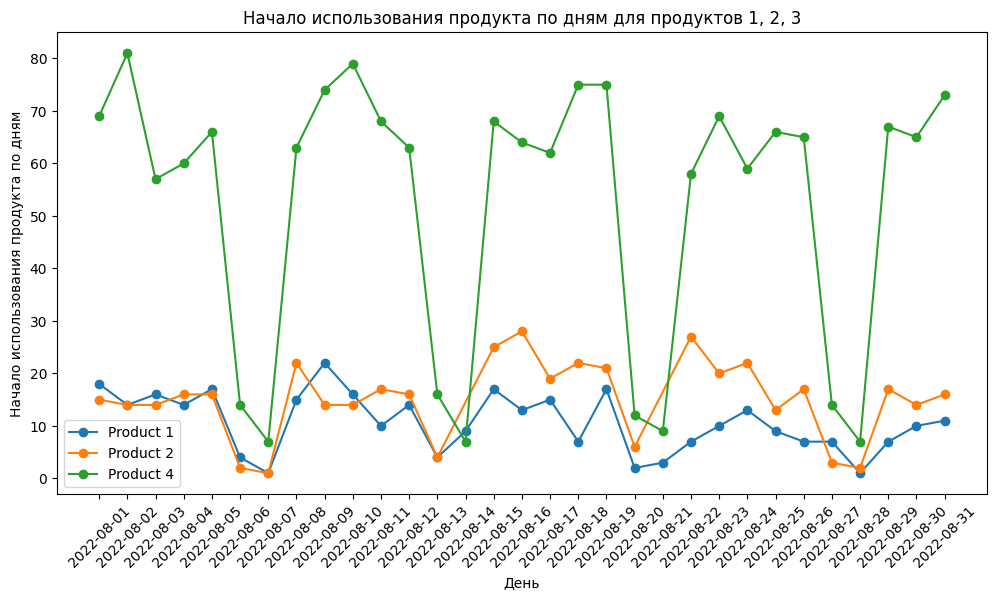

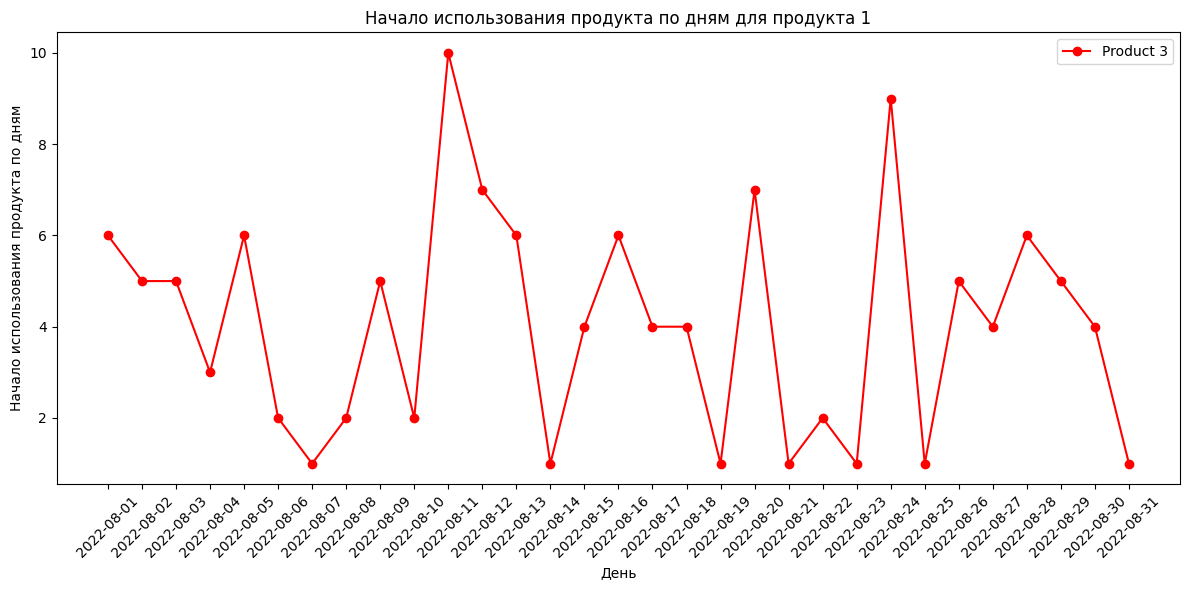

In [34]:
product_1 = df[df['product_id'] == 1]
product_2 = df[df['product_id'] == 2]
product_3 = df[df['product_id'] == 3]
product_4 = df[df['product_id'] == 4]


plt.figure(figsize=(12, 6))
plt.plot(product_1['day'], product_1['usage_count'], label='Product 1', marker='o')
plt.plot(product_2['day'], product_2['usage_count'], label='Product 2', marker='o')
plt.plot(product_4['day'], product_4['usage_count'], label='Product 4', marker='o')

plt.xlabel('День')
plt.ylabel('Начало использования продукта по дням')
plt.title('Начало использования продукта по дням для продуктов 1, 2, 3')
plt.xticks(rotation=45)
plt.legend()


plt.figure(figsize=(12, 6))
plt.plot(product_3['day'], product_3['usage_count'], label='Product 3', marker='o', color='red')

plt.xlabel('День')
plt.ylabel('Начало использования продукта по дням')
plt.title('Начало использования продукта по дням для продукта 1')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Можно видеть, что по пятницам и субботам "утилизация" клиентов наимаеньшая. Вероятно это связано с тем, что клиенты в эти дни отдыхают, и им не до использования товаров. Впрочем, для товара 3 это скорее не верно.

In [ ]:
%%sql
SELECT
    *,
    julianday(finish_dttm) - julianday(create_dttm) AS task_duration
FROM
    task
WHERE
    abs((finish_dttm - create_dttm) - (SELECT AVG(finish_dttm - create_dttm) FROM task)) > 2 * (SELECT AVG(finish_dttm - create_dttm) FROM task);

 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm,task_duration
65299911,1.0,GI,2021-04-02 10:25:39,2022-08-05 12:08:11,490.0712037035264
88729200,1.0,GI,2021-12-02 18:35:10,2022-08-05 12:42:49,245.75531250005588
30098521,1.0,GI,2021-06-18 20:28:12,2022-09-20 12:07:07,458.65202546305954
51080931,1.0,GI,2021-09-12 05:14:42,2022-08-09 15:28:27,331.4262152775191
45976214,1.0,GI,2021-11-19 19:27:30,2022-10-12 02:00:00,326.2725694444962
28389188,1.0,GI,2021-10-13 21:17:59,2022-10-14 10:24:49,365.54641203721985
51411789,1.0,GI,2021-12-21 11:30:02,2022-08-22 18:14:45,244.28105324041098
36621897,1.0,GI,2021-09-06 13:41:01,2022-08-09 15:35:10,337.0792708331719
15887925,1.0,GI,2021-10-09 00:44:02,2022-08-05 15:23:29,300.6107291667722
78127149,1.0,GI,2021-05-28 12:43:36,2022-08-03 11:37:09,431.95385416643694


In [ ]:
result = %sql SELECT *, julianday(finish_dttm) - julianday(create_dttm) AS task_duration FROM task WHERE abs((finish_dttm - create_dttm) - (SELECT AVG(finish_dttm - create_dttm) FROM task)) > 2 * (SELECT AVG(finish_dttm - create_dttm) FROM task);

 * sqlite:////content/data.db
Done.


In [ ]:
df_time_duration_anomaly = result.DataFrame()

Отбираем задачи с длительностью большей средней в два раза. Длительность в среднем около года. Либо это аномалия, либо специфика задания позволяет его выполнять в течении длительного времени.

In [ ]:
%%sql
SELECT *
FROM task
WHERE task_stage_id IS NULL;

 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm
15924764,None,CM,2022-08-25 13:02:45,2022-08-26 12:18:14
16344820,None,CM,2022-08-26 15:04:52,2022-09-06 16:22:02
92549484,None,CM,2022-07-31 05:15:27,2022-08-03 12:17:36
22342,None,CM,2022-08-08 18:10:26,2022-08-10 14:49:36
98815064,None,CM,2022-08-07 18:34:17,2022-08-15 11:57:03
94707726,None,CM,2022-08-02 06:45:24,2022-08-03 16:32:04
5465159,None,CM,2022-08-14 05:07:18,2022-08-16 12:50:49
7012177,None,CM,2022-08-16 12:05:01,2022-08-22 10:52:56
95245469,None,CM,2022-08-03 16:45:16,2022-08-04 08:56:02
14849597,None,CM,2022-08-24 05:11:32,2022-09-30 14:03:14


In [ ]:
result = %sql SELECT * FROM task WHERE task_stage_id IS NULL;

 * sqlite:////content/data.db
Done.


In [ ]:
df_CM_anomaly = result.DataFrame()

In [ ]:
%%sql
SELECT *
FROM task
WHERE task_stage_id IS NULL AND source_system_cd= "CM";

 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm
15924764,None,CM,2022-08-25 13:02:45,2022-08-26 12:18:14
16344820,None,CM,2022-08-26 15:04:52,2022-09-06 16:22:02
92549484,None,CM,2022-07-31 05:15:27,2022-08-03 12:17:36
22342,None,CM,2022-08-08 18:10:26,2022-08-10 14:49:36
98815064,None,CM,2022-08-07 18:34:17,2022-08-15 11:57:03
94707726,None,CM,2022-08-02 06:45:24,2022-08-03 16:32:04
5465159,None,CM,2022-08-14 05:07:18,2022-08-16 12:50:49
7012177,None,CM,2022-08-16 12:05:01,2022-08-22 10:52:56
95245469,None,CM,2022-08-03 16:45:16,2022-08-04 08:56:02
14849597,None,CM,2022-08-24 05:11:32,2022-09-30 14:03:14


Аномалия. Столбцы с source_system_cd = "CM", по какой-то причине не сохраняют task_stage_id.

In [ ]:
with pd.ExcelWriter('db_analysys.xlsx', engine='xlsxwriter') as writer:
    df_horoscope.to_excel(writer, sheet_name='horoscope', index=False)
    df_agent_ratio.to_excel(writer, sheet_name='agent_ratio', index=False)
    df_agent_ratio_by_management.to_excel(writer, sheet_name='agent_ratio_by_management', index=False)
    df_management_group_by_group_nm.to_excel(writer, sheet_name='management__group_nm', index=False)
    df_group.to_excel(writer, sheet_name='group', index=False)
    df_management.to_excel(writer, sheet_name='management', index=False)
    df_kazan.to_excel(writer, sheet_name='vazan', index=False)
    df_virs.to_excel(writer, sheet_name='virs', index=False)
    df_result_for_hour.to_excel(writer, sheet_name='result_for_hour', index=False)
    df_days_sales_conversion.to_excel(writer, sheet_name='days_sales_conversion', index=False)
    df_queue.to_excel(writer, sheet_name='queue', index=False)
    df_null_task.to_excel(writer, sheet_name='null_task', index=False)
    df_task_by_days.to_excel(writer, sheet_name='task_by_days', index=False)
    df_task_by_days_1_23.to_excel(writer, sheet_name='task_by_days_1_23', index=False)
    df_client_util_by_day.to_excel(writer, sheet_name='client_util_by_day', index=False)
    df_time_duration_anomaly.to_excel(writer, sheet_name='time_duration_anomaly', index=False)
    df_CM_anomaly.to_excel(writer, sheet_name='CM_anomaly', index=False)

In [35]:
pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.2 MB/s eta 0:00:00
